In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
num_data = {
    'netifier': 7773,
    'dat': 500,
    'hsd': 13169,
    'casa': 1080,
    'hoasa': 2854,
}

In [21]:
def average_results(results):
    return pd.concat(results).groupby(level=0).mean().astype(float)

In [22]:
def load_result(dataset, ignored_method=None):
    methods = ['lc', 'mc', 'kmeans', 'coreset', 'comal', 'besra', 'random']
    percentage = [1, 10]
    results = {}

    if ignored_method is not None:
        for method in ignored_method:
            methods.remove(method)

    for num in percentage:
        for method in methods:
            if method == 'lc':
                results[num] = [pd.read_csv(f"../{dataset}/metrics/init-size-exp/{dataset}-{method}-init-{num}-results.csv")]
            else:
                results[num].append(pd.read_csv(f"../{dataset}/metrics/init-size-exp/{dataset}-{method}-init-{num}-results.csv"))

    for method in methods:
        results[5] = [pd.read_csv(f"../{dataset}/metrics/{dataset}-{method}-{'2' if dataset in ['casa', 'hoasa'] else '1'}-results.csv")]
            

    for i in results.keys():
        results[i] = average_results(results[i])

    keys = list(results.keys())
    keys.sort()

    results = {i: results[i] for i in keys}
    return results

In [ ]:
def plot_results(metric='F1 Micro'):
    fig, axes = plt.subplots(3, 2, figsize=(15, 15))
    datasets = ['netifier', 'dat', 'hsd', 'casa', 'hoasa']

    for i in range(5):
        ax = axes[i // 2, i % 2]
        result = load_result(datasets[i], ['besra'])
        data_used = [round(x / num_data[datasets[i]] * 100, 0) for x in result[5]['Data Used']]
        for percentage in result.keys():
            x = result[percentage]['Data Used'] / num_data[datasets[i]] * 100
            ax.plot(x, result[percentage][metric], label=str(percentage) + '% Init Size', marker='o')

        ax.set_title(f"{datasets[i].upper()}")
        ax.set_xlabel("Data Used (%)")
        ax.set_ylabel(metric)
        ax.legend(fontsize='x-large', loc='lower right')
        ax.grid(True, axis='x')
        
    axes.flat[-1].axis('off')
    plt.xticks(data_used)
    plt.tight_layout()
    plt.show()

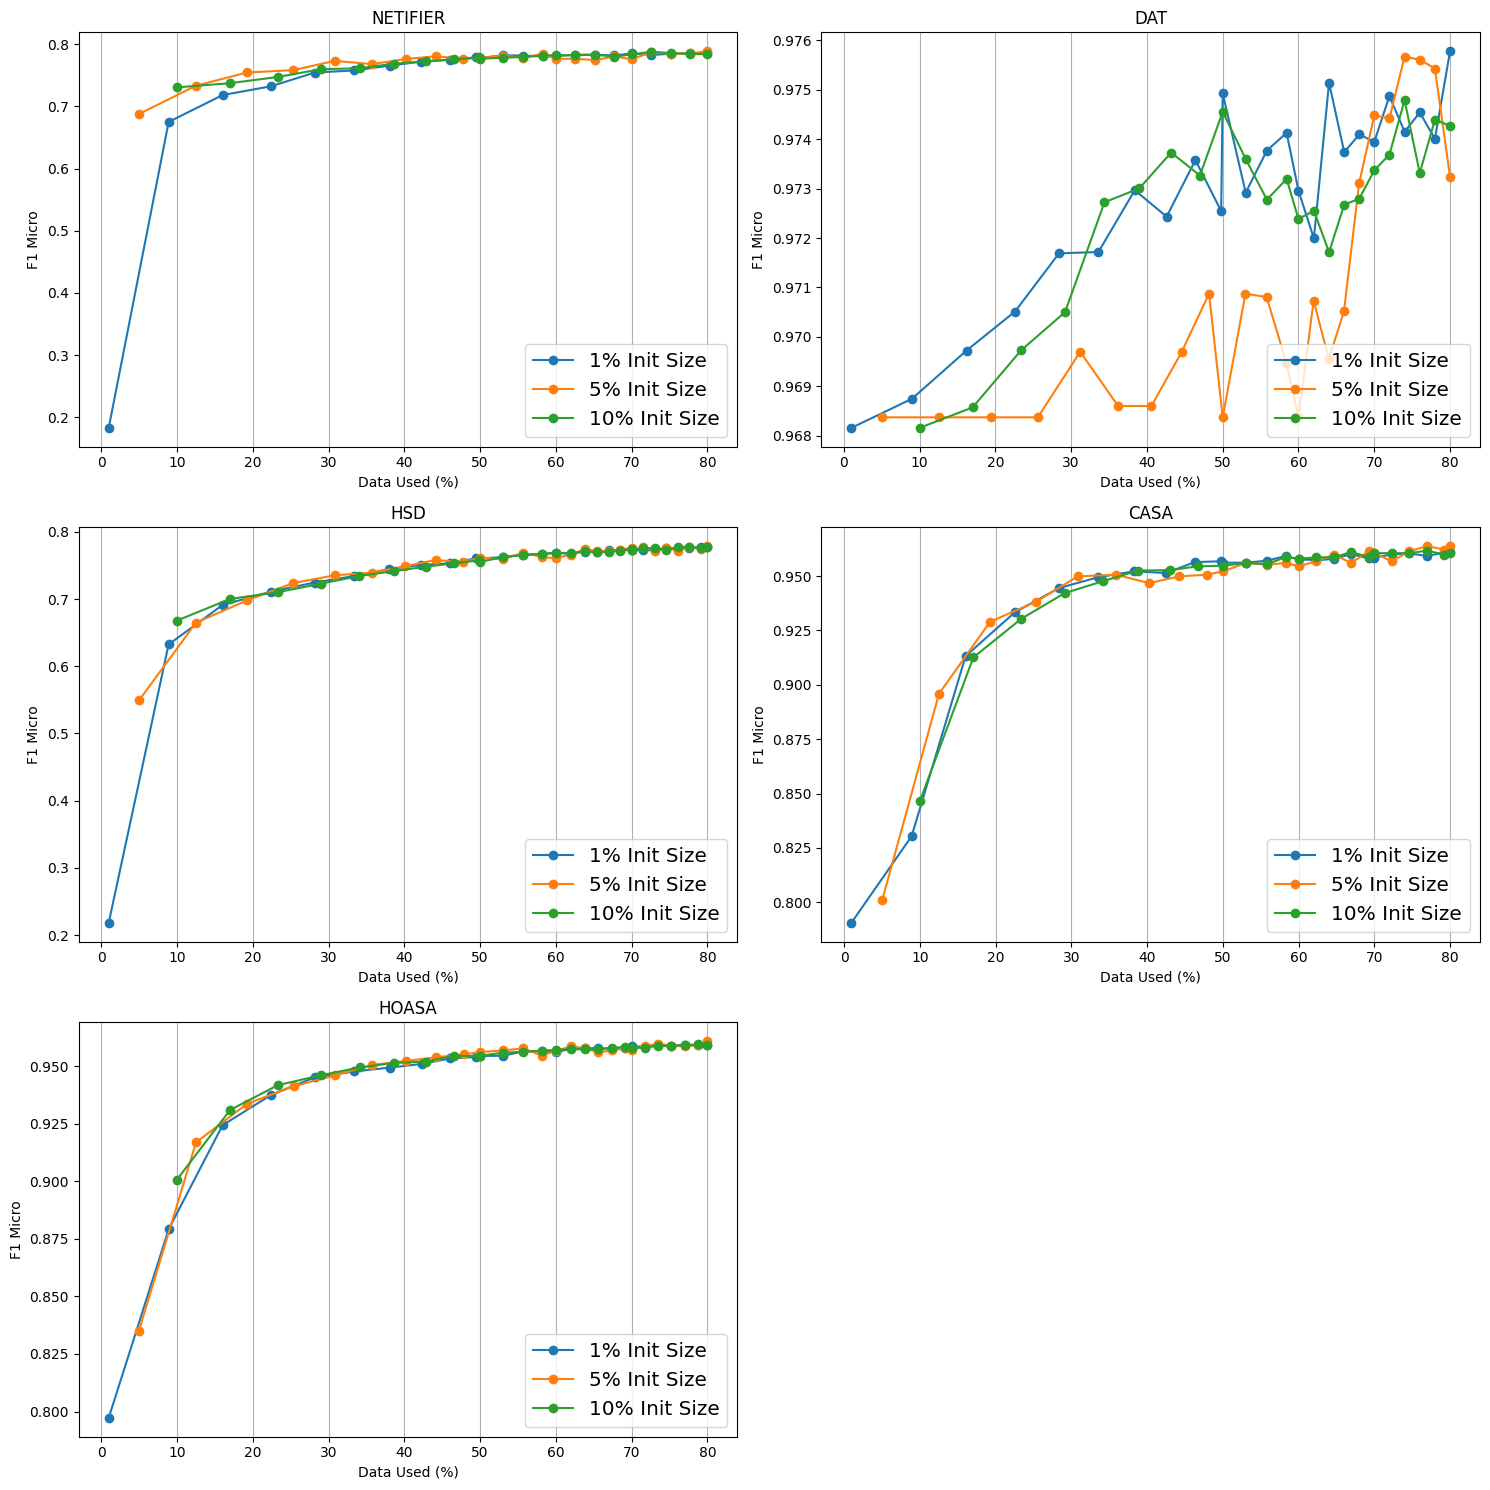

In [24]:
plot_results('F1 Micro')